In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [35]:
game_stats = pd.read_csv('../csv/game_stats.csv')
game_stats["totalGoals"] = game_stats["home_goals"] + game_stats["away_goals"]
game_stats = game_stats[game_stats["totalGoals"] < 10]  # remove outliers 99% of games will be kept
del game_stats["Unnamed: 0"]
del game_stats["home_goals"]
del game_stats["away_goals"]
del game_stats["home_powerPlayGoals"]
del game_stats["away_powerPlayGoals"]
del game_stats["home_powerPlayOpportunities"]
del game_stats["away_powerPlayOpportunities"]

game_stats = game_stats.drop_duplicates()
game_stats = game_stats.dropna()

game_stats

,home_pim,home_shots,home_powerPlayPercentage,home_faceOffWinPercentage,home_blocked,home_takeaways,home_giveaways,home_hits,away_pim,away_shots,away_powerPlayPercentage,away_faceOffWinPercentage,away_blocked,away_takeaways,away_giveaways,away_hits,totalGoals
2,10,29,0.0,68.2,17,5,2,23,12,15,33.3,31.8,8,6,4,23,6
5,10,27,0.0,51.6,13,8,16,45,4,40,40.0,48.4,4,3,9,22,4
9,4,41,50.0,41.4,18,4,10,24,4,15,50.0,58.6,11,4,9,13,7
10,2,46,50.0,45.6,9,8,12,29,6,39,0.0,54.4,13,6,6,20,7
11,2,24,66.7,57.1,7,3,19,23,6,34,0.0,42.9,15,9,9,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21383,4,32,0.0,52.6,15,5,9,29,8,19,0.0,47.4,23,6,7,33,4
21384,4,23,0.0,43.9,23,14,19,20,6,24,50.0,56.1,17,8,7,13,3
21386,9,32,0.0,63.6,13,4,12,27,9,37,0.0,36.4,17,7,10,27,7
21390,4,37,75.0,49.0,6,3,11,9,8,21,0.0,51.0,10,3,2,17,5


### Partition Training and Testing Data

In [36]:
col_names = [col for col in game_stats.columns]


originalGoals = game_stats["totalGoals"]

# z = (x-mean)/std
# x = (z*std)+mean

original_mean = game_stats.mean()
original_std = game_stats.std()

game_stats_normalized =(game_stats-original_mean)/original_std
game_stats = game_stats_normalized
#game_stats["totalGoals"] = originalGoals

features = np.array(game_stats.loc[:, game_stats.columns != 'totalGoals'],  dtype='float32')
targets = np.array(game_stats['totalGoals'], dtype='float32')


x_train = features[:int(features.shape[0] * 0.8)]
t_train = targets[:int(targets.shape[0] * 0.8)]

x_test = features[int(features.shape[0] * 0.8):]
t_test = targets[int(targets.shape[0] * 0.8):]

# Augment squared features to x_train and x_test
x_train = np.concatenate((x_train, x_train ** 2), axis=1)
x_test = np.concatenate((x_test, x_test ** 2), axis=1)

# x_train_df = pd.DataFrame(x_train)
# x_train_df

### Train & Analyze Gradient Descent Optimization for Linear Regression Model

In [37]:
# gradient descent algorithm on x_train and t_train:
def gradient_descent(x_train, t_train, learning_rate, epochs):
    # initialize theta
    theta = np.zeros(x_train.shape[1])
    theta_history = []
    costs = []
    for epoch in tqdm.tqdm(range(epochs)):
        # mini batch gradient descent
        for i in range(x_train.shape[0]):
            x = x_train[i]
            t = t_train[i]
            y = np.dot(x, theta)
            cost = (y - t) ** 2
            # update theta
            theta -= learning_rate * 2 * x * (y - t)
        # append theta_history
        theta_history.append(theta)
        # calculate cost
        cost = (1 / (2 * x_train.shape[0])) * np.sum(np.square(np.dot(x_train, theta) - t_train))
        
        # store the theta
        theta_history.append(theta)
        costs.append(np.average(cost))
    return theta, theta_history, costs

In [38]:
theta, theta_history, costs = gradient_descent(x_train, t_train, 0.000015, 150)

100%|██████████| 150/150 [00:11<00:00, 12.53it/s]


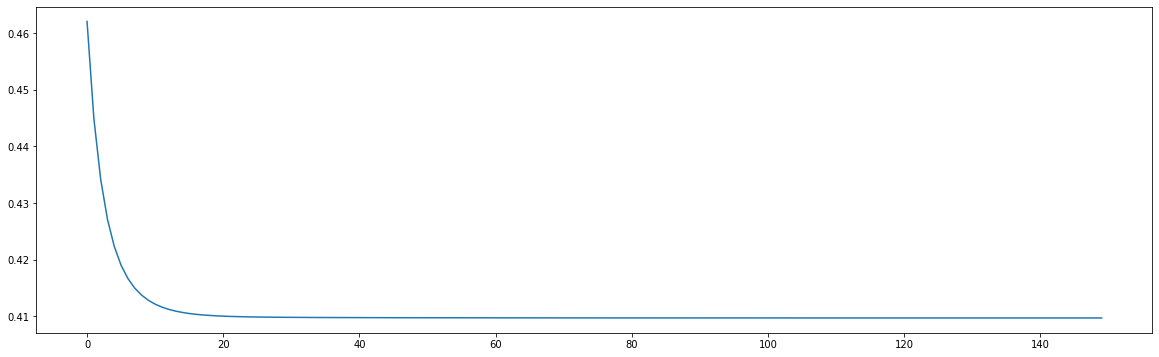

In [39]:
plt.rcParams["figure.figsize"] = (20, 6)
plt.plot(costs)

In [40]:
train_predictions = np.dot(x_train, theta)

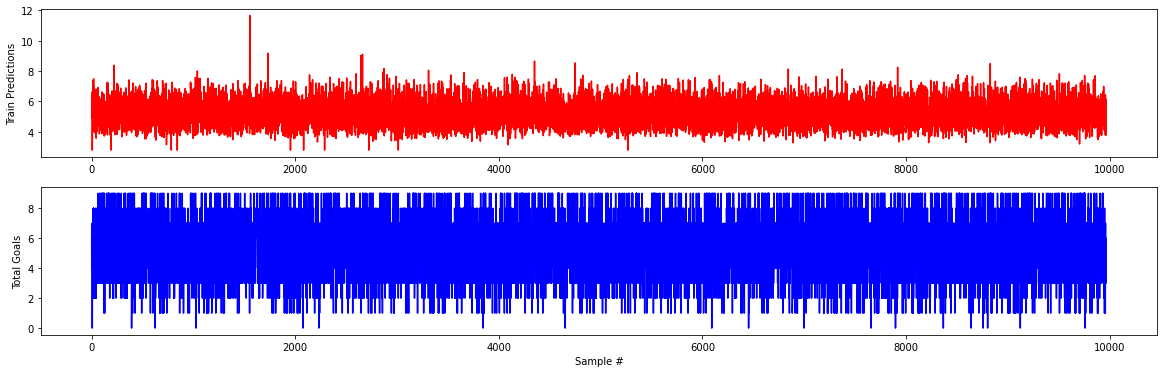

In [41]:
# denoarmalize predictions
train_predictions = [(t_i * original_std["totalGoals"]) + original_mean["totalGoals"] for t_i in train_predictions]
t_train = [(ti * original_std["totalGoals"]) + original_mean["totalGoals"] for ti in t_train]

plt.plot(train_predictions, 'o')
plt.plot(t_train, 'g')


plt.subplot(211)
plt.plot(train_predictions, 'r-')
plt.ylabel('Train Predictions')
plt.subplot(212)
plt.plot(t_train, 'b-')
plt.ylabel('Total Goals')
plt.xlabel('Sample #')
plt.show()


array([[<AxesSubplot:title={'center':'Prediction Dist. (Train)'}>,
        <AxesSubplot:title={'center':'Target Dist. (Train)'}>]],
      dtype=object)

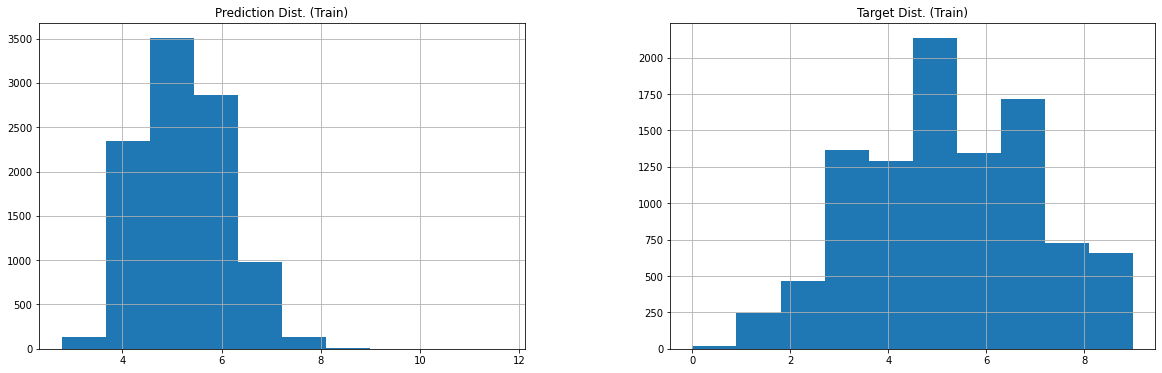

In [42]:
pred_and_targets_df = pd.DataFrame({'Prediction Dist. (Train)': train_predictions, 'Target Dist. (Train)': t_train})
pred_and_targets_df.hist()

### Test Weights Against Unseen Data

In [43]:
test_predictions = np.dot(x_test, theta)

test_predictions = [(t_i * original_std["totalGoals"]) + original_mean["totalGoals"] for t_i in test_predictions]
t_test = [(ti * original_std["totalGoals"]) + original_mean["totalGoals"] for ti in t_test]

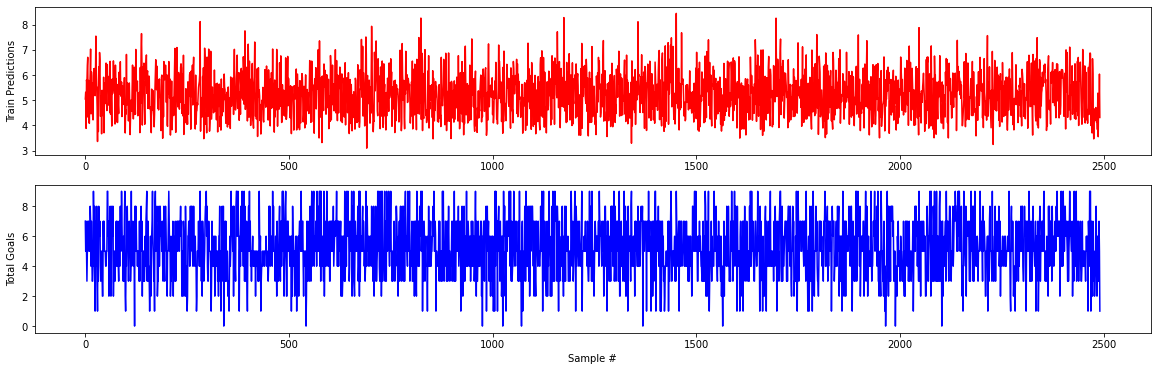

In [44]:
plt.subplot(211)
plt.plot(test_predictions, 'r-')
plt.ylabel('Train Predictions')
plt.subplot(212)
plt.plot(t_test, 'b-')
plt.ylabel('Total Goals')
plt.xlabel('Sample #')
plt.show()

array([[<AxesSubplot:title={'center':'Prediction Dist. (Test)'}>,
        <AxesSubplot:title={'center':'Target Dist. (Test)'}>]],
      dtype=object)

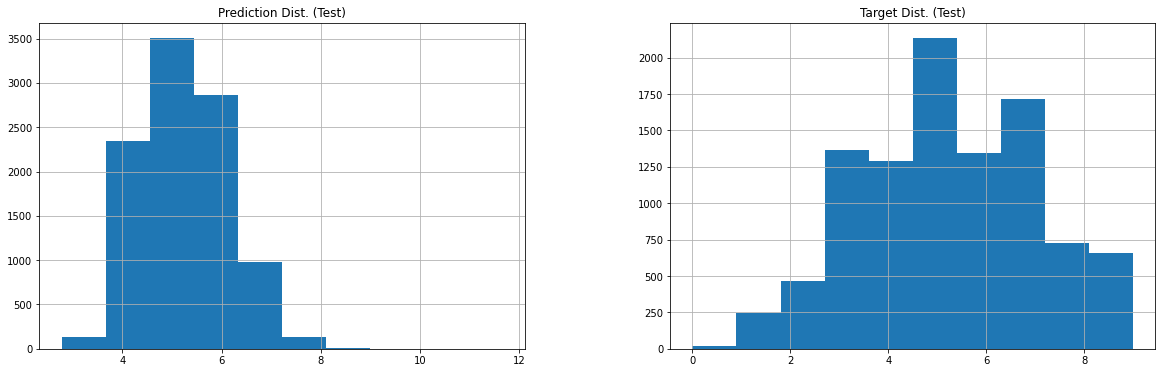

In [45]:
pred_and_targets_df = pd.DataFrame({'Prediction Dist. (Test)': train_predictions, 'Target Dist. (Test)': t_train})
pred_and_targets_df.hist()

array([[<AxesSubplot:title={'center':'Test Loss'}>]], dtype=object)

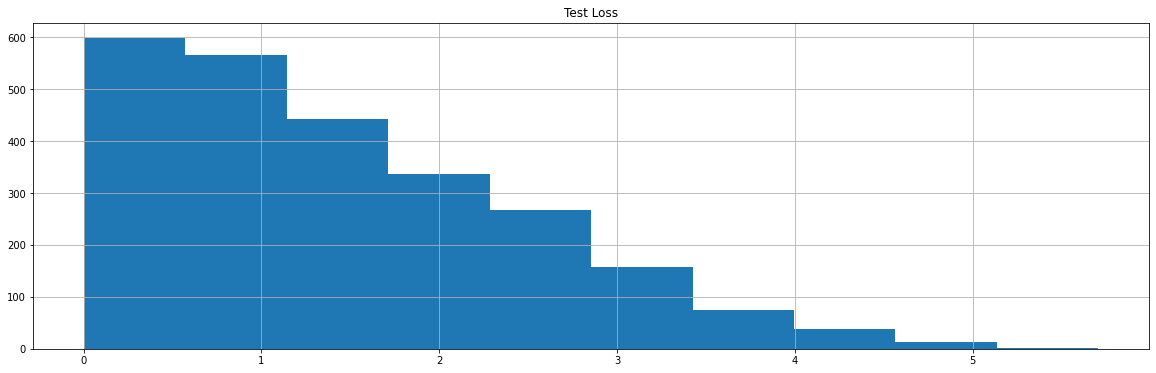

In [46]:
test_losses = [abs(t_i - p_i) for t_i, p_i in zip(t_test, test_predictions)]

test_loss_df = pd.DataFrame({'Test Loss': test_losses})
test_loss_df.hist()